# Joint state analysis
<font size="3"> Comparison between reference values of HTC Valve trackers and the calculated values of Cardsflow </font>

In [32]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [71]:
# in case not installed
#!pip install sklearn
#!pip install matplotlib
#!pip install ipywidgets jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt

In [42]:
# load dataset generated from the script write_data_from_rosbag_HTC_Cardsflow.py ...
# which took data from rosbag recording
dataset = pd.read_csv('/home/niels/Documents/Roboy/joint_state_analysis/data/2021_05_25_right_shoulder_60min_wdisp.log',delim_whitespace=True, header=0)

In [18]:
dataset = dataset.dropna()                                             # remove nan rows
pd.options.display.max_columns = None # let all columns appear in table
dataset['roll_error'] = dataset['roll_htc']-dataset['roll_cf']     # error_roll
dataset['pitch_error'] = dataset['pitch_htc']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error'] = dataset['yaw_htc']-dataset['yaw_cf']         # error_yaw

# also put limits on HTC_tracker joint values
# limit shoulder_right_axis0 (roll)  lower="-1.0" upper="0.3"
# limit shoulder_right_axis1 (pitch) lower="-1.2" upper="0.0"
# limit shoulder_right_axis2 (yaw)   lower="-0.1" upper="0.1"
dataset['roll_clamped'] = dataset['roll_htc'].clip(upper=0.3, lower=-1.0)
dataset['pitch_clamped'] = dataset['pitch_htc'].clip(upper=0.0, lower=-1.2)
dataset['yaw_clamped'] = dataset['yaw_htc'].clip(upper=0.1, lower=-0.1)


dataset['roll_error_cl'] = dataset['roll_clamped']-dataset['roll_cf']    # error_roll
dataset['pitch_error_cl'] = dataset['pitch_clamped']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error_cl'] = dataset['yaw_clamped']-dataset['yaw_cf']       # error_yaw

# turn values around for # mp0-mp3 * -1 # mp12-mp15 * -1 (in original data e.g. m_p0 has switched values in comparison to m_e0)
dataset['ms_s0'] = dataset['ms_s0']*(-1) 
dataset['ms_s1'] = dataset['ms_s1']*(-1)
dataset['ms_s2'] = dataset['ms_s2']*(-1) 
dataset['ms_s3'] = dataset['ms_s3']*(-1) 

dataset['ms_s12'] = dataset['ms_s12']*(-1) 
dataset['ms_s13'] = dataset['ms_s13']*(-1)
dataset['ms_s14'] = dataset['ms_s14']*(-1) 
dataset['ms_s15'] = dataset['ms_s15']*(-1)
print(dataset.columns.tolist())
dataset

['roll_htc', 'pitch_htc', 'yaw_htc', 'roll_cf', 'pitch_cf', 'yaw_cf', 'ms_s0', 'ms_s1', 'ms_s2', 'ms_s3', 'ms_s4', 'ms_s5', 'ms_s6', 'ms_s7', 'ms_s8', 'ms_s9', 'ms_s10', 'ms_s11', 'ms_s12', 'ms_s13', 'ms_s14', 'ms_s15', 'm_e0', 'm_e1', 'm_e2', 'm_e3', 'm_e4', 'm_e5', 'm_e6', 'm_e7', 'm_e8', 'm_e9', 'm_e10', 'm_e11', 'm_e12', 'm_e13', 'm_e14', 'm_e15', 'm_d0', 'm_d1', 'm_d2', 'm_d3', 'm_d4', 'm_d5', 'm_d6', 'm_d7', 'm_d8', 'm_d9', 'm_d10', 'm_d11', 'm_d12', 'm_d13', 'm_d14', 'm_d15', 'm_cur0', 'm_cur1', 'm_cur2', 'm_cur3', 'm_cur4', 'm_cur5', 'm_cur6', 'm_cur7', 'm_cur8', 'm_cur9', 'm_cur10', 'm_cur11', 'm_cur12', 'm_cur13', 'm_cur14', 'm_cur15', 'mc_s0', 'mc_s1', 'mc_s2', 'mc_s3', 'mc_s4', 'mc_s5', 'mc_s6', 'mc_s7', 'mc_s8', 'mc_s9', 'mc_s10', 'mc_s11', 'mc_s12', 'mc_s13', 'mc_s14', 'mc_s15', 'timestamp_cf', 'timestamp_htc', 'timestamp_enc0', 'roll_error', 'pitch_error', 'yaw_error', 'roll_clamped', 'pitch_clamped', 'yaw_clamped', 'roll_error_cl', 'pitch_error_cl', 'yaw_error_cl']


,roll_htc,pitch_htc,yaw_htc,roll_cf,pitch_cf,yaw_cf,ms_s0,ms_s1,ms_s2,ms_s3,ms_s4,ms_s5,ms_s6,ms_s7,ms_s8,ms_s9,ms_s10,ms_s11,ms_s12,ms_s13,ms_s14,ms_s15,m_e0,m_e1,m_e2,m_e3,m_e4,m_e5,m_e6,m_e7,m_e8,m_e9,m_e10,m_e11,m_e12,m_e13,m_e14,m_e15,m_d0,m_d1,m_d2,m_d3,m_d4,m_d5,m_d6,m_d7,m_d8,m_d9,m_d10,m_d11,m_d12,m_d13,m_d14,m_d15,m_cur0,m_cur1,m_cur2,m_cur3,m_cur4,m_cur5,m_cur6,m_cur7,m_cur8,m_cur9,m_cur10,m_cur11,m_cur12,m_cur13,m_cur14,m_cur15,mc_s0,mc_s1,mc_s2,mc_s3,mc_s4,mc_s5,mc_s6,mc_s7,mc_s8,mc_s9,mc_s10,mc_s11,mc_s12,mc_s13,mc_s14,mc_s15,timestamp_cf,timestamp_htc,timestamp_enc0,roll_error,pitch_error,yaw_error,roll_clamped,pitch_clamped,yaw_clamped,roll_error_cl,pitch_error_cl,yaw_error_cl
0,-0.090669,-0.138901,0.054701,0.000363,-2.656993e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,0.000196,0.000724,0.000352,0.006656,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003221,0.000176,0.000300,0.000104,0.000130,0.000639,0.000280,0.006513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,47.0,16.0,-20.0,6.0,-1.0,-14.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0625,0.1625,0.1875,0.1250,0.1125,-0.0375,0.1750,-0.0375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,-0.000196,-0.000724,-0.000352,-0.006656,1621953809972788799,1621953809979475975,1621953809979076409,-0.091032,-0.138901,0.054727,-0.090669,-0.138901,0.054701,-0.091032,-0.138901,0.054727
1,-0.090821,-0.139030,0.054600,0.000363,-2.058909e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,0.000196,0.000724,0.000352,0.006656,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003221,0.000176,0.000300,0.000104,0.000130,0.000639,0.000280,0.006513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,47.0,16.0,-20.0,6.0,-1.0,-14.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0375,0.1250,0.0500,0.1000,0.2000,-0.0500,0.1500,0.1625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,-0.000196,-0.000724,-0.000352,-0.006656,1621953810023271559,1621953810020973920,1621953810017170897,-0.091183,-0.139030,0.054626,-0.090821,-0.139030,0.054600,-0.091183,-0.139030,0.054626
2,-0.091327,-0.139056,0.054847,0.000363,-2.703128e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,0.000196,0.000724,0.000352,0.006656,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003221,0.000176,0.000300,0.000104,0.000130,0.000639,0.000280,0.006513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,47.0,16.0,-20.0,6.0,-1.0,-14.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500,0.0875,0.2250,0.3250,0.1750,0.1875,0.0875,0.1375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,-0.000196,-0.000724,-0.000352,-0.006656,1621953810129000967,1621953810132024288,1621953810132772000,-0.091691,-0.139056,0.054873,-0.091327,-0.139056,0.054847,-0.091691,-0.139056,0.054873
3,-0.091075,-0.138458,0.054734,0.000365,-2.745374e-08,-0.000026,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,0.000196,0.000724,0.000352,0.006656,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.003221,0.000176,0.000300,0.000104,0.000130,0.000639,0.000280,0.006513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,47.0,16.0,-20.0,6.0,-1.0,-14.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1250,0.1125,0.1750,0.0750,0.1000,0.0750,0.1000,0.0500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000352,0.000411,0.000222,-0.000196,-0.000724,-0.000352,-0.006656,1621953810356360095,1621953810348018407,1621953810349026590,-0.091440,-0.138458,0.054

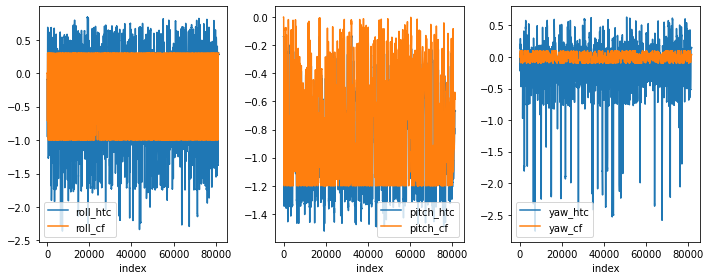

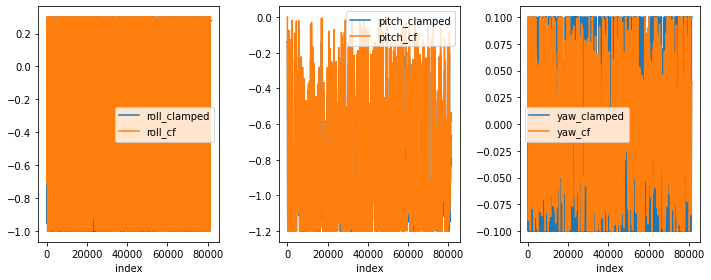

In [44]:
# all the dataset
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns


dataset.reset_index().plot(x='index', y=["roll_htc", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch_htc", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw_htc", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout 

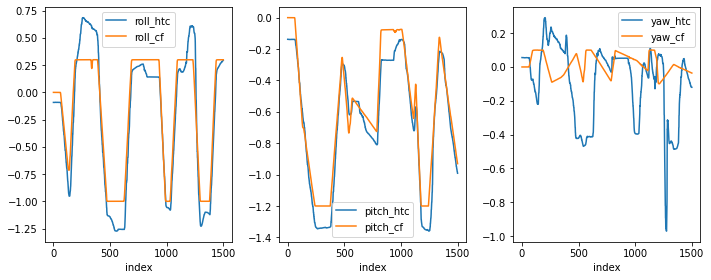

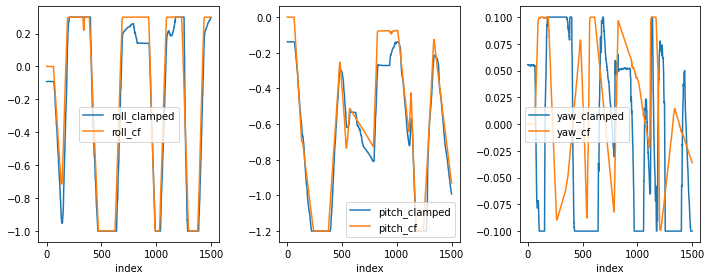

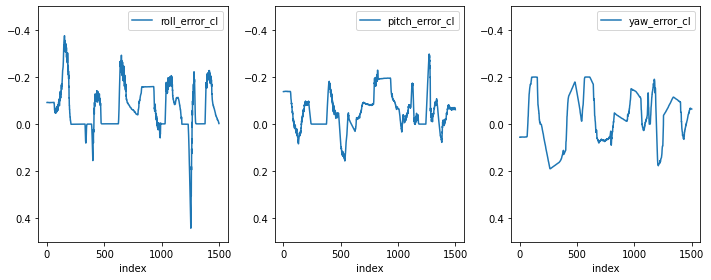

In [45]:
# plot detailed view of specified interval
specific_interval = dataset[1:1500] # set interval to your needs


#plot comparison withOUT clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=["roll_htc", "roll_cf"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["pitch_htc", "pitch_cf"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["yaw_htc", "yaw_cf"],ax=ax3)       
plt.tight_layout()  # Optional ... often improves the layout 

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"],ax=ax3)
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y='roll_error_cl', ax=ax1, ylim=(0.5,-0.5)) # plot roll_error
specific_interval.reset_index().plot(x='index', y='pitch_error_cl', ax=ax2, ylim=(0.5,-0.5)) # plot pitch_error
specific_interval.reset_index().plot(x='index', y='yaw_error_cl', ax=ax3, ylim=(0.5,-0.5)) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout 

In [46]:
#mean
mean_roll = dataset['roll_error_cl'].mean()
mean_pitch = dataset['pitch_error_cl'].mean() 
mean_yaw = dataset['yaw_error_cl'].mean() 

#standard deviation 
std_roll = dataset['roll_error_cl'].std()
std_pitch = dataset['pitch_error_cl'].std() 
std_yaw = dataset['yaw_error_cl'].std()

#Mean squarred Error Calculations
roll_ref_cl = dataset[['roll_clamped']]
pitch_ref_cl = dataset[['pitch_clamped']]
yaw_ref_cl = dataset[['yaw_clamped']]

roll_cf = dataset[['roll_cf']]
pitch_cf = dataset[['pitch_cf']]
yaw_cf = dataset[['yaw_cf']]

roll_rms = np.sqrt(mean_squared_error(roll_ref_cl, roll_cf))     # mean squarred error roll
pitch_rms = np.sqrt(mean_squared_error(pitch_ref_cl, pitch_cf))  # mean squarred error pitch
yaw_rms = np.sqrt(mean_squared_error(yaw_ref_cl, yaw_cf))        # mean squarred error yaw

print("mean_roll_error:  ", round(mean_roll,4), "std_roll_error:  ", round(std_roll,3), "roll_rms:  ", round(roll_rms,3))
print("mean_pitch_error: ", round(mean_pitch,4), "std_pitch_error: ", round(std_pitch,3), "pitch_rms: ",round(pitch_rms,3))
print("mean_yaw_error:   ", round(mean_yaw,4), "std_yaw_error:   ", round(std_yaw,3), "yaw_rms:   ",round(yaw_rms,3))

mean_roll_error:   -0.0408 std_roll_error:   0.108 roll_rms:   0.116
mean_pitch_error:  -0.0446 std_pitch_error:  0.082 pitch_rms:  0.094
mean_yaw_error:    -0.0258 std_yaw_error:    0.094 yaw_rms:    0.097


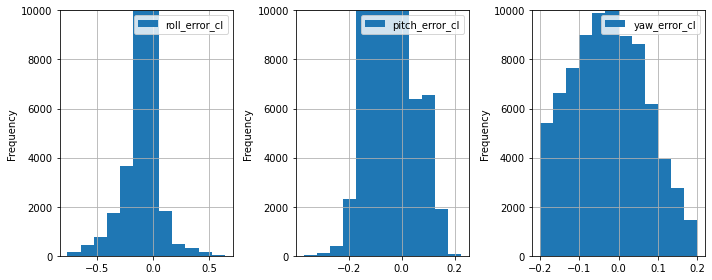

In [47]:
# determine how often which error amount occours
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
ylim_val=(0,10000)
dataset['roll_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax1, ylim=ylim_val)
dataset['pitch_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax2, ylim=ylim_val)
dataset['yaw_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax3, ylim=ylim_val)
plt.tight_layout()  # Optional ... often improves the layout 


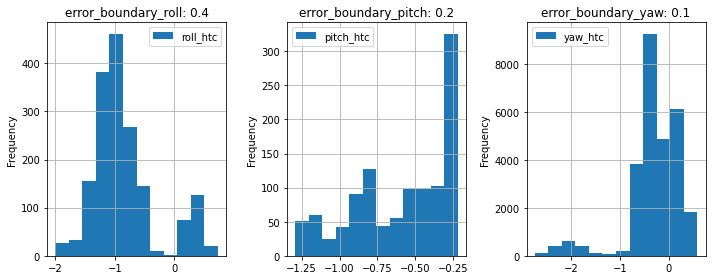

In [48]:
# determine joint angles where |roll_error_cl| > x

 # set error amount boundary for each joint
error_boundary_roll = 0.4
error_boundary_pitch = 0.2
error_boundary_yaw = 0.1

dataset['roll_error_>x'] = ((dataset.roll_error_cl>error_boundary_roll) | (dataset.roll_error_cl< -error_boundary_roll))
dataset['pitch_error_>x'] = ((dataset.pitch_error_cl>error_boundary_pitch) | (dataset.pitch_error_cl< -error_boundary_pitch))
dataset['yaw_error_>x'] = ((dataset.yaw_error_cl>error_boundary_yaw) | (dataset.yaw_error_cl< -error_boundary_yaw))
dataset1=dataset.loc[dataset['roll_error_>x'] == True]
dataset2=dataset.loc[dataset['pitch_error_>x'] == True]
dataset3=dataset.loc[dataset['yaw_error_>x'] == True]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset1['roll_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax1, title=f"error_boundary_roll: {error_boundary_roll}")
dataset2['pitch_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax2, title=f"error_boundary_pitch: {error_boundary_pitch}")
dataset3['yaw_htc'].plot.hist(bins=12, grid=True, legend=True,ax =ax3, title=f"error_boundary_yaw: {error_boundary_yaw}")
plt.tight_layout()  # Optional ... often improves the layout 

## Motor position and encoder comparison

In [49]:
for i in range(16):
    dataset['m'+str(i)+'_error'] = dataset['m_p'+str(i)]-dataset['m_e'+str(i)] 

<AxesSubplot:xlabel='index'>

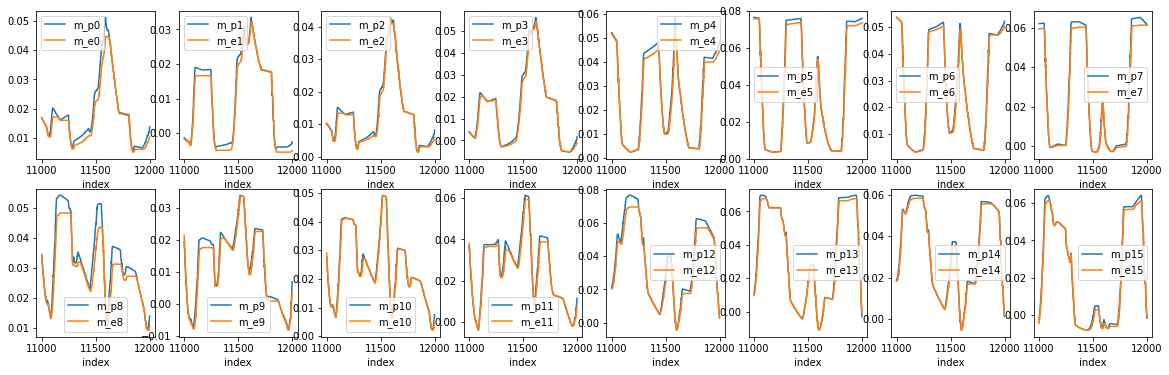

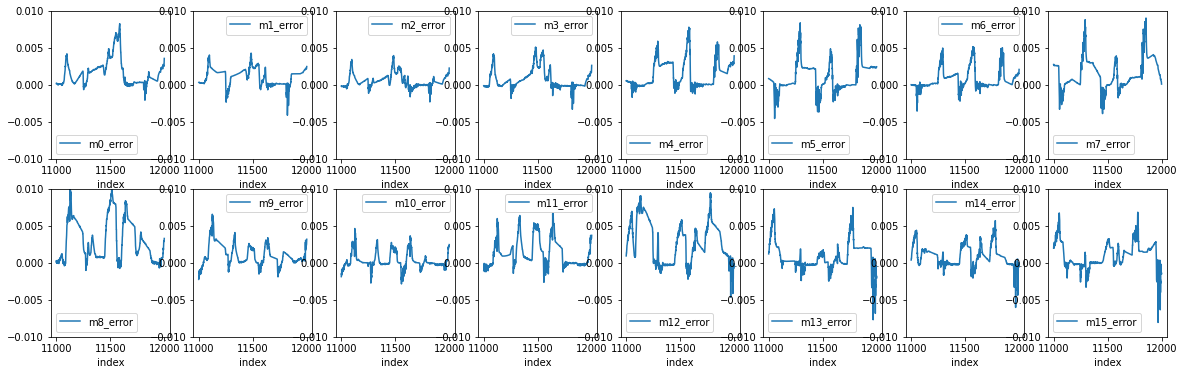

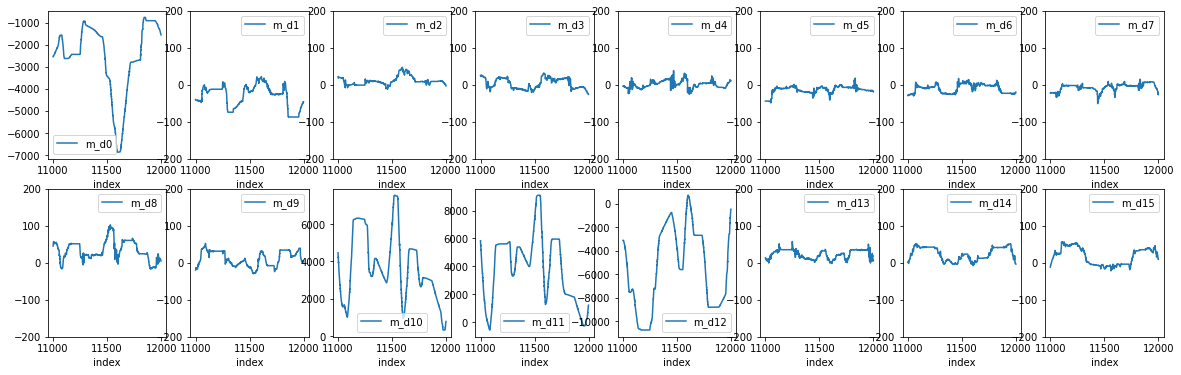

In [56]:


# plot detailed view of specified interval
specific_interval = dataset[11000:12000] # set interval to your needs

no_motors = 56
columns = 8
rows = int(no_motors/columns)

#plot comparison
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns


specific_interval.reset_index().plot(x='index', y=["m_p0", "m_e0"], ax=ax0)
specific_interval.reset_index().plot(x='index', y=["m_p1", "m_e1"], ax=ax1)
specific_interval.reset_index().plot(x='index', y=["m_p2", "m_e2"], ax=ax2)
specific_interval.reset_index().plot(x='index', y=["m_p3", "m_e3"], ax=ax3)
specific_interval.reset_index().plot(x='index', y=["m_p4", "m_e4"], ax=ax4)
specific_interval.reset_index().plot(x='index', y=["m_p5", "m_e5"], ax=ax5) 
specific_interval.reset_index().plot(x='index', y=["m_p6", "m_e6"], ax=ax6)
specific_interval.reset_index().plot(x='index', y=["m_p7", "m_e7"], ax=ax7)
specific_interval.reset_index().plot(x='index', y=["m_p8", "m_e8"], ax=ax8)
specific_interval.reset_index().plot(x='index', y=["m_p9", "m_e9"], ax=ax9)
specific_interval.reset_index().plot(x='index', y=["m_p10", "m_e10"], ax=ax10)
specific_interval.reset_index().plot(x='index', y=["m_p11", "m_e11"], ax=ax11)
specific_interval.reset_index().plot(x='index', y=["m_p12", "m_e12"], ax=ax12)
specific_interval.reset_index().plot(x='index', y=["m_p13", "m_e13"], ax=ax13) 
specific_interval.reset_index().plot(x='index', y=["m_p14", "m_e14"], ax=ax14)
specific_interval.reset_index().plot(x='index', y=["m_p15", "m_e15"], ax=ax15) 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot error
ylim_val = (-0.01,0.01)
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=['m0_error'], ax=ax0, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m1_error'], ax=ax1, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m2_error'], ax=ax2, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m3_error'], ax=ax3, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m4_error'], ax=ax4, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m5_error'], ax=ax5, ylim=ylim_val) 
specific_interval.reset_index().plot(x='index', y=['m6_error'], ax=ax6, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m7_error'], ax=ax7, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m8_error'], ax=ax8, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m9_error'], ax=ax9, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m10_error'], ax=ax10, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m11_error'], ax=ax11, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m12_error'], ax=ax12, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m13_error'], ax=ax13, ylim=ylim_val) 
specific_interval.reset_index().plot(x='index', y=['m14_error'], ax=ax14, ylim=ylim_val)
specific_interval.reset_index().plot(x='index', y=['m15_error'], ax=ax15, ylim=ylim_val) 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15)) = plt.subplots(2,8, figsize=(20,6))  # 1 row, 3 columns

specific_interval.reset_index().plot(x='index', y=['m_d0'], ax=ax0)
specific_interval.reset_index().plot(x='index', y=['m_d1'], ax=ax1, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d2'], ax=ax2, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d3'], ax=ax3, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d4'], ax=ax4, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d5'], ax=ax5, ylim=ylim_val_d) 
specific_interval.reset_index().plot(x='index', y=['m_d6'], ax=ax6, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d7'], ax=ax7, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d8'], ax=ax8, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d9'], ax=ax9, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d10'], ax=ax10)
specific_interval.reset_index().plot(x='index', y=['m_d11'], ax=ax11)
specific_interval.reset_index().plot(x='index', y=['m_d12'], ax=ax12)
specific_interval.reset_index().plot(x='index', y=['m_d13'], ax=ax13, ylim=ylim_val_d) 
specific_interval.reset_index().plot(x='index', y=['m_d14'], ax=ax14, ylim=ylim_val_d)
specific_interval.reset_index().plot(x='index', y=['m_d15'], ax=ax15, ylim=ylim_val_d) 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

In [57]:
#TODO

#mean
mean_list = []
for i in range(15):
    name = "m"+str(i)+"_error"
    mean_list.append(dataset[name].mean())
print("mean_list: \n",mean_list)

#standard deviation 
std_list = []
for i in range(15):
    name = "m"+str(i)+"_error"
    std_list.append(dataset[name].std())
print("std_list: \n", std_list)

#Mean squarred Error Calculations
m_p_list = []
for i in range(15):
    name = "m_p"+str(i)
    m_p_list.append(dataset[name])

m_e_list = []
for i in range(15):
    name = "m_e"+str(i)
    m_e_list.append(dataset[name])    

#m_e20 = dataset[['m_e20']]

rms_list = []
for i in range(15):
    name_p = "m_p"+str(i)
    name_e = "m_e"+str(i)
    rms_list.append(np.sqrt(mean_squared_error(m_p_list[i], m_e_list[i])))  # TODO should be bigger for some motors
print("rms_list: \n", rms_list)
#m20_rms = np.sqrt(mean_squared_error(m_p20, m_e20))        # mean squarred error yaw

m_d_mean_list = []
for i in range(15):
    name = "m_d"+str(i)
    m_d_mean_list.append(dataset[name].mean())  
print("mean_disp_list: \n", m_d_list)

m_d_std_list = []
for i in range(15):
    name = "m_d"+str(i)
    m_d_std_list.append(dataset[name].std())  
print("std_disp_list: \n", m_d_std_list)

mean_list: 
 [-0.002906444524773011, 0.006474490674007599, -0.004890269790685046, 0.006337424158226188, 0.0072393765024849855, -0.004897877654146816, 0.0063015556976202276, -0.004463525193072691, 0.008701359187274002, 0.006539939930618637, 0.005890497719513346, 0.006950599964030843, -0.003140603492815251, -0.004751752821436971, -0.004657289234128427]
std_list: 
 [0.16547228855229434, 0.16486312420208807, 0.16528559165162357, 0.16484378902076305, 0.16480114901219037, 0.1655761865123978, 0.16480728716215867, 0.1654837167271443, 0.1637085592456873, 0.16472726471614793, 0.16401429206423251, 0.16415421181389653, 0.1673399130026443, 0.16722556892459325, 0.16702279746595616]
rms_list: 
 [0.16549679724746388, 0.16498919788783326, 0.16535690643038423, 0.1649645551940615, 0.16495906827742696, 0.1656475973998458, 0.16492670614616103, 0.16554288783651466, 0.16393863895653876, 0.16485602740823035, 0.16411903014836976, 0.16430029100735832, 0.16736835558679555, 0.16729204136476322, 0.1670866933496610

# Dataset with time stamps

In [176]:
# load dataset generated from the script write_data_from_rosbag_HTC_Cardsflow.py ...
# which took data from rosbag recording
dataset = pd.read_csv('/home/niels/Documents/Roboy/joint_state_analysis/data/2021_05_25_shoulder_right_cf_wtimestamp_test.log',delim_whitespace=True, header=0)
#dataset = dataset.dropna()# remove nan rows

dataset['timestamp_cf'] = pd.to_datetime(dataset['timestamp_cf'], unit='ns')
dataset['timestamp_htc'] = pd.to_datetime(dataset['timestamp_htc'], unit='ns')
dataset['timestamp_enc0'] = pd.to_datetime(dataset['timestamp_enc0'], unit='ns')
# devide dataset into corresponding timestamps {timestamp_cf timestamp_htc timestamp_enc0}

ds_cf = dataset[['roll_cf', 'pitch_cf', 'yaw_cf', 'timestamp_cf']]
ds_htc = dataset[['roll_htc', 'pitch_htc', 'yaw_htc', 'timestamp_htc']]
ds_mostate = dataset[['ms_s0', 'ms_s1', 'ms_s2', 'ms_s3', 'ms_s4', 'ms_s5', 
                      'ms_s6', 'ms_s7', 'ms_s8', 'ms_s9', 'ms_s10', 'ms_s11', 
                      'ms_s12', 'ms_s13', 'ms_s14', 'ms_s15', 'm_e0', 'm_e1', 
                      'm_e2', 'm_e3', 'm_e4', 'm_e5', 'm_e6', 'm_e7', 'm_e8', 
                      'm_e9', 'm_e10', 'm_e11', 'm_e12', 'm_e13', 'm_e14', 
                      'm_e15', 'm_d0', 'm_d1', 'm_d2', 'm_d3', 'm_d4', 'm_d5', 
                      'm_d6', 'm_d7', 'm_d8', 'm_d9', 'm_d10', 'm_d11', 'm_d12', 
                      'm_d13', 'm_d14', 'm_d15', 'm_cur0', 'm_cur1', 'm_cur2', 
                      'm_cur3', 'm_cur4', 'm_cur5', 'm_cur6', 'm_cur7', 'm_cur8', 
                      'm_cur9', 'm_cur10', 'm_cur11', 'm_cur12', 'm_cur13', 
                      'm_cur14', 'm_cur15', 'mc_s0', 'timestamp_enc0']]
#print table if needed:
#dataset
#ds_cf
#ds_htc
#ds_mostate

ds_cf.index = ds_cf['timestamp_cf']
ds_htc.index = ds_htc['timestamp_htc']
ds_mostate.index = ds_mostate['timestamp_enc0']
ds_cf = ds_cf.dropna()   # remove nan rows
ds_htc = ds_htc.dropna() # remove nan rows
ds_mostate = ds_mostate.dropna() # remove nan rows

tol = pd.Timedelta('5 milliseconds')
ds_cf_htc_merged = pd.merge_asof(left=ds_cf,right=ds_htc,right_index=True,left_index=True,direction='nearest',tolerance=tol)

ds_cf_htc_merged = ds_cf_htc_merged.dropna() # remove nan rows

ds_cf_htc_merged['roll_error'] = ds_cf_htc_merged['roll_htc']-ds_cf_htc_merged['roll_cf']     # error_roll
ds_cf_htc_merged['pitch_error'] = ds_cf_htc_merged['pitch_htc']-ds_cf_htc_merged['pitch_cf'] # error_pitch
ds_cf_htc_merged['yaw_error'] = ds_cf_htc_merged['yaw_htc']-ds_cf_htc_merged['yaw_cf']         # error_yaw

ds_cf_htc_merged['roll_clamped'] = ds_cf_htc_merged['roll_htc'].clip(upper=0.3, lower=-1.0)
ds_cf_htc_merged['pitch_clamped'] = ds_cf_htc_merged['pitch_htc'].clip(upper=0.0, lower=-1.2)
ds_cf_htc_merged['yaw_clamped'] = ds_cf_htc_merged['yaw_htc'].clip(upper=0.1, lower=-0.1)

ds_cf_htc_merged['roll_error_cl'] = ds_cf_htc_merged['roll_clamped']-ds_cf_htc_merged['roll_cf']    # error_roll
ds_cf_htc_merged['pitch_error_cl'] = ds_cf_htc_merged['pitch_clamped']-ds_cf_htc_merged['pitch_cf'] # error_pitch
ds_cf_htc_merged['yaw_error_cl'] = ds_cf_htc_merged['yaw_clamped']-ds_cf_htc_merged['yaw_cf']       # error_yaw

# turn values around for # mp0-mp3 * -1 # mp12-mp15 * -1 (in original data e.g. m_p0 has switched values in comparison to m_e0)
ds_mostate['ms_s0'] = ds_mostate['ms_s0']*(-1) 
ds_mostate['ms_s1'] = ds_mostate['ms_s1']*(-1)
ds_mostate['ms_s2'] = ds_mostate['ms_s2']*(-1) 
ds_mostate['ms_s3'] = ds_mostate['ms_s3']*(-1) 

ds_mostate['ms_s12'] = ds_mostate['ms_s12']*(-1) 
ds_mostate['ms_s13'] = ds_mostate['ms_s13']*(-1)
ds_mostate['ms_s14'] = ds_mostate['ms_s14']*(-1) 
ds_mostate['ms_s15'] = ds_mostate['ms_s15']*(-1)

for i in range(16):
    ds_mostate['m'+str(i)+'_error'] = ds_mostate['ms_s'+str(i)]-ds_mostate['m_e'+str(i)] 

#print(dataset.columns.tolist())
ds_cf_htc_merged

,roll_cf,pitch_cf,yaw_cf,timestamp_cf,roll_htc,pitch_htc,yaw_htc,timestamp_htc,roll_error,pitch_error,yaw_error,roll_clamped,pitch_clamped,yaw_clamped,roll_error_cl,pitch_error_cl,yaw_error_cl
timestamp_cf,,,,,,,,,,,,,,,,,
2021-05-25 14:43:30.023271559,0.000363,-2.058909e-08,-0.000026,2021-05-25 14:43:30.023271559,-0.090821,-0.139030,0.054600,2021-05-25 14:43:30.020973920,-0.091183,-0.139030,0.054626,-0.090821,-0.139030,0.054600,-0.091183,-0.139030,0.054626
2021-05-25 14:43:30.129000967,0.000363,-2.703128e-08,-0.000026,2021-05-25 14:43:30.129000967,-0.091327,-0.139056,0.054847,2021-05-25 14:43:30.132024288,-0.091691,-0.139056,0.054873,-0.091327,-0.139056,0.054847,-0.091691,-0.139056,0.054873
2021-05-25 14:43:31.023271707,0.000369,-3.236603e-08,-0.000026,2021-05-25 14:43:31.023271707,-0.091416,-0.138402,0.054482,2021-05-25 14:43:31.025237083,-0.091785,-0.138402,0.054509,-0.091416,-0.138402,0.054482,-0.091785,-0.138402,0.054509
2021-05-25 14:43:33.585303334,-0.482160,-4.746258e-01,0.099291,2021-05-25 14:43:33.585303334,-0.559330,-0.436270,-0.109814,2021-05-25 14:43:33.582113504,-0.077169,0.038355,-0.209106,-0.559330,-0.436270,-0.100000,-0.077169,0.038355,-0.199291
2021-05-25 14:43:34.054420600,-0.592932,-5.833668e-01,0.099788,2021-05-25 14:43:34.054420600,-0.712189,-0.535529,-0.151159,2021-05-25 14:43:34.053278684,-0.119257,0.047838,-0.250946,-0.712189,-0.535529,-0.100000,-0.119257,0.047838,-0.199788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 15:49:23.280987172,0.300000,-5.833860e-01,0.038631,2021-05-25 15:49:23.280987172,0.279027,-0.666536,0.144858,2021-05-25 15:49:23.280344247,-0.020973,-0.083150,0.106228,0.279027,-0.666536,0.100000,-0.020973,-0.083150,0.061369
2021-05-25 15:49:23.844262273,0.300000,-5.833858e-01,0.038631,2021-05-25 15:49:23.844262273,0.278835,-0.667036,0.145331,2021-05-25 15:49:23.844556093,-0.021165,-0.083650,0.106701,0.278835,-0.667036,0.100000,-0.021165,-0.083650,0.061369
2021-05-25 15:49:25.129220190,0.300000,-5.833889e-01,0.038642,2021-05-25 15:49:25.129220190,0.277847,-0.667093,0.144448,2021-05-25 15:49:25.129333496,-0.022153,-0.083704,0.105806,0.277847,-0.667093,0.100000,-0.022153,-0.083704,0.061358


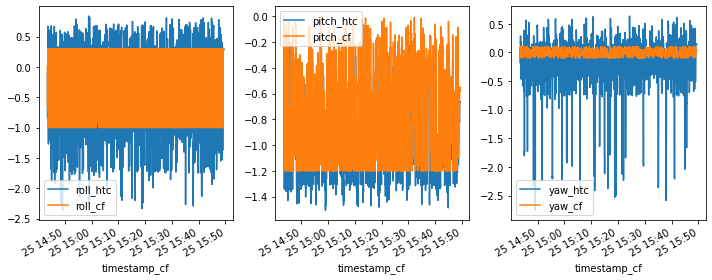

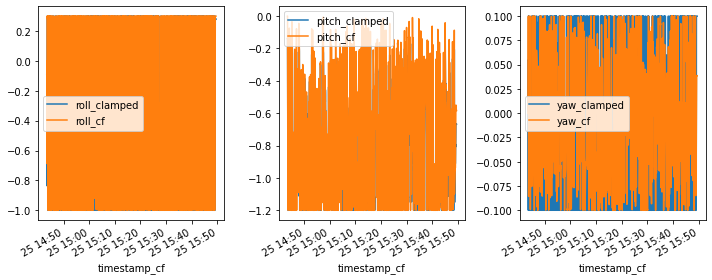

In [160]:
# all the dataset
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

ds_cf_htc_merged.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
ds_cf_htc_merged.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
ds_cf_htc_merged.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
ds_cf_htc_merged.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
ds_cf_htc_merged.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
ds_cf_htc_merged.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout

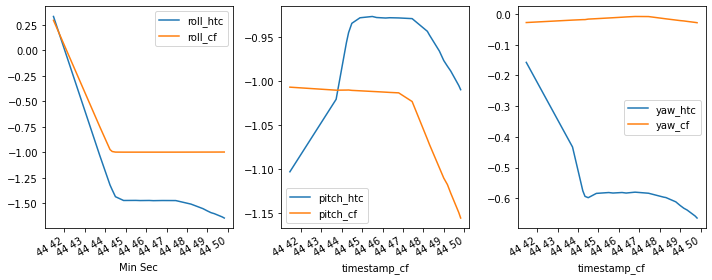

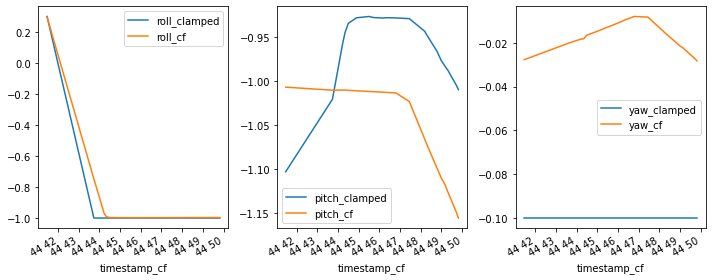

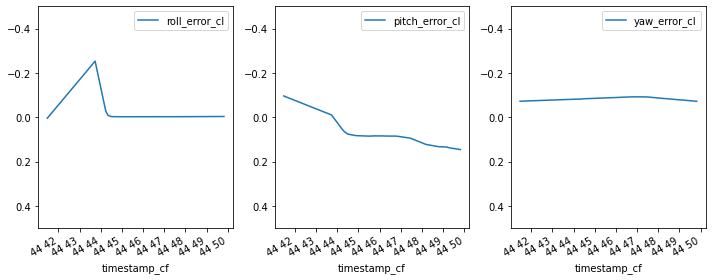

In [161]:
import matplotlib.dates as md

# plot detailed view of specified interval
specific_interval = ds_cf_htc_merged.between_time('14:44:40','14:44:50') # set interval to your needs

#plot comparison withOUT clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

xfmt = md.DateFormatter('%M %S') # %f #  for millisenconds
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2)
specific_interval.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"],ax=ax3)       
plt.tight_layout()  # Optional ... often improves the layout 

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1)
specific_interval.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2)
specific_interval.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"],ax=ax3)
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y='roll_error_cl', ax=ax1, ylim=(0.5,-0.5)) # plot roll_error
specific_interval.plot(x='timestamp_cf', y='pitch_error_cl', ax=ax2, ylim=(0.5,-0.5)) # plot pitch_error
specific_interval.plot(x='timestamp_cf', y='yaw_error_cl', ax=ax3, ylim=(0.5,-0.5)) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout 

In [162]:
ds_merged_roll_error = ds_cf_htc_merged[['timestamp_cf','roll_error_cl']]
ds_cf_htc_merged['ds_merged_roll_rolling_err'] = ds_merged_roll_error.rolling('3s', min_periods=3).mean()
ds_cf_htc_merged.nlargest(10, 'ds_merged_roll_rolling_err')

,roll_cf,pitch_cf,yaw_cf,timestamp_cf,roll_htc,pitch_htc,yaw_htc,timestamp_htc,roll_error,pitch_error,yaw_error,roll_clamped,pitch_clamped,yaw_clamped,roll_error_cl,pitch_error_cl,yaw_error_cl,ds_merged_roll_rolling_err
timestamp_cf,,,,,,,,,,,,,,,,,,
2021-05-25 14:59:03.344584511,-0.364595,-1.200000,0.082263,2021-05-25 14:59:03.344584511,0.185108,-1.505291,-0.156434,2021-05-25 14:59:03.348723411,0.549703,-0.305291,-0.238697,0.185108,-1.200000,-0.100000,0.549703,0.000000,-0.182263,0.362884
2021-05-25 14:45:02.398664499,-0.996424,-1.088286,-0.047707,2021-05-25 14:45:02.398664499,-1.867269,-1.178549,-1.806197,2021-05-25 14:45:02.400176525,-0.870846,-0.090263,-1.758490,-1.000000,-1.178549,-0.100000,-0.003576,-0.090263,-0.052293,0.337327
2021-05-25 14:59:03.248700584,-0.333250,-1.200000,0.081523,2021-05-25 14:59:03.248700584,0.392189,-1.485047,0.034176,2021-05-25 14:59:03.248646974,0.725439,-0.285047,-0.047347,0.300000,-1.200000,0.034176,0.633250,0.000000,-0.047347,0.316179
2021-05-25 15:22:04.124816368,-0.613626,-1.200000,-0.049049,2021-05-25 15:22:04.124816368,-1.769556,-1.409091,-2.221944,2021-05-25 15:22:04.121465444,-1.155930,-0.209091,-2.172895,-1.000000,-1.200000,-0.100000,-0.386374,0.000000,-0.050951,0.311339
2021-05-25 14:53:35.679338943,-0.364001,-1.200000,0.066542,2021-05-25 14:53:35.679338943,-0.088772,-1.448413,-0.227234,2021-05-25 14:53:35.682113170,0.275229,-0.248413,-0.293775,-0.088772,-1.200000,-0.100000,0.275229,0.000000,-0.166542,0.308796
2021-05-25 14:45:02.834257117,-0.997402,-1.059479,-0.043807,2021-05-25 14:45:02.834257117,-1.896439,-1.132769,-1.794522,2021-05-25 14:45:02.833804368,-0.899038,-0.073290,-1.750715,-1.000000,-1.132769,-0.100000,-0.002598,-0.073290,-0.056193,0.294837
2021-05-25 15:44:54.689293599,-0.416258,-1.200000,-0.099629,2021-05-25 15:44:54.689293599,-0.266730,-1.486337,-0.621230,2021-05-25 15:44:54.692094564,0.149528,-0.286337,-0.521601,-0.266730,-1.200000,-0.100000,0.149528,0.000000,-0.000371,0.264410
2021-05-25 14:45:02.937500572,-0.997394,-1.054234,-0.043318,2021-05-25 14:45:02.937500572,-1.890504,-1.128123,-1.787060,2021-05-25 14:45:02.936870336,-0.893111,-0.073888,-1.743742,-1.000000,-1.128123,-0.100000,-0.002606,-0.073888,-0.056682,0.261787
2021-05-25 15:22:50.656242786,-0.995747,-1.200000,0.055065,2021-05-25 15:22:50.656242786,-1.985781,-1.168172,-1.836309,2021-05-25 15:22:50.653942346,-0.990034,0.031828,-1.891375,-1.000000,-1.168172,-0.100000,-0.004253,0.031828,-0.155065,0.239658


<AxesSubplot:xlabel='Min Sec'>

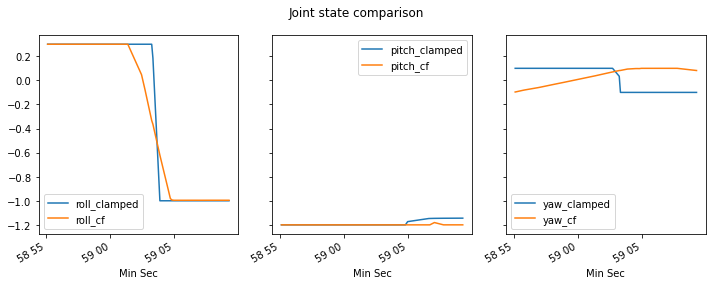

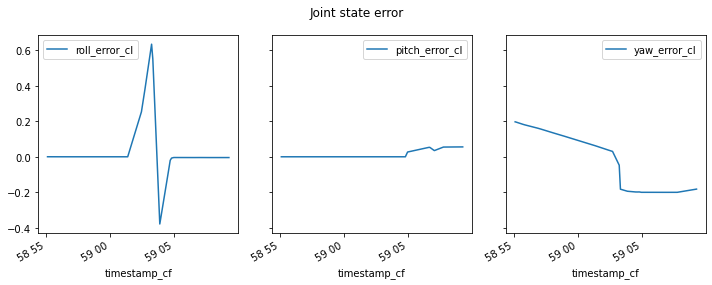

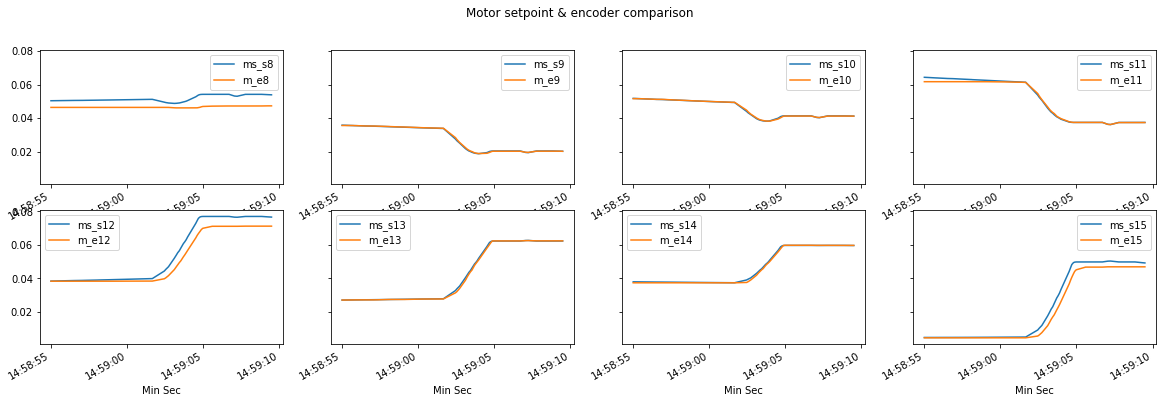

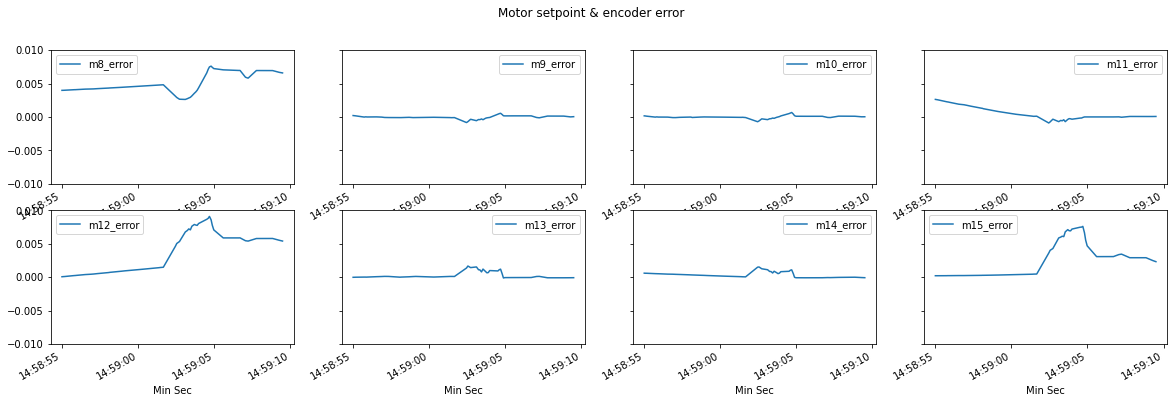

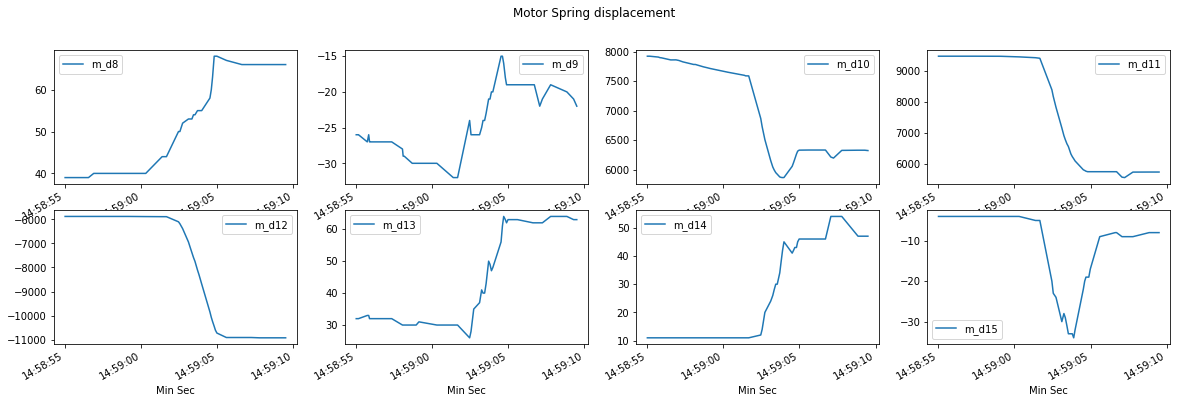

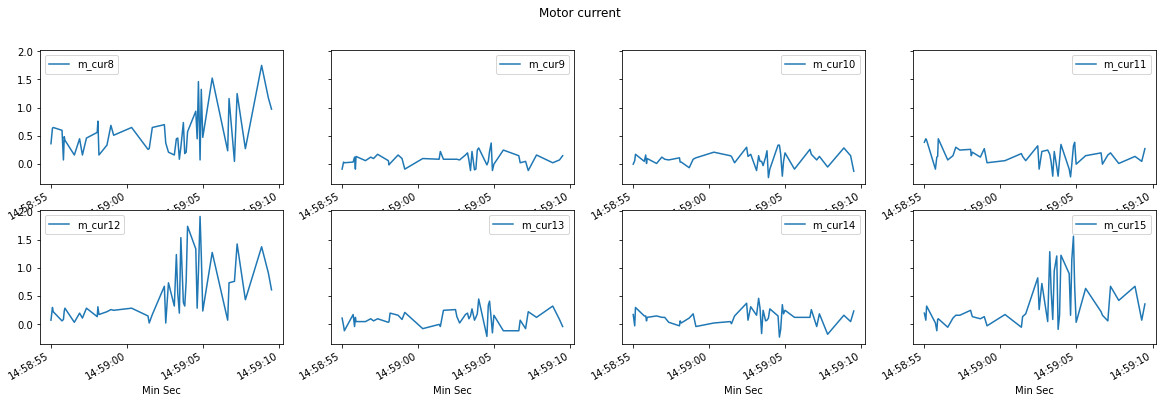

In [191]:
# plot detailed view of specified interval
int_11 , int12 = '14:58:55','14:59:10'

specific_interval = ds_cf_htc_merged.between_time(int_11 , int12) # set interval to your needs

#highest_error_intervals_roll: '14:44:40','14:44:50'


#plot comparison withOUT clamped values
"""fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

xfmt = md.DateFormatter('%M %S') # %f #  for millisenconds
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')       
plt.tight_layout()  # Optional ... often improves the layout """

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state comparison')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4),sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state error')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y='roll_error_cl', ax=ax1) # plot roll_error
specific_interval.plot(x='timestamp_cf', y='pitch_error_cl', ax=ax2) # plot pitch_error
specific_interval.plot(x='timestamp_cf', y='yaw_error_cl', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout

# plot right shoulder motor setpoint, encoder0 and current

specific_interval = ds_mostate.between_time(int_11 , int12)
#plot comparison

fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder comparison')
specific_interval.plot(x='timestamp_enc0', y=["ms_s8", "m_e8"], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s9", "m_e9"], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s10", "m_e10"], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s11", "m_e11"], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s12", "m_e12"], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s13", "m_e13"], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=["ms_s14", "m_e14"], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s15", "m_e15"], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 


#plot error
ylim_val = (-0.01,0.01)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder error')
specific_interval.plot(x='timestamp_enc0', y=['m8_error'], ax=ax8, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m9_error'], ax=ax9, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m10_error'], ax=ax10, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m11_error'], ax=ax11, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m12_error'], ax=ax12, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m13_error'], ax=ax13, ylim=ylim_val, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m14_error'], ax=ax14, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m15_error'], ax=ax15, ylim=ylim_val, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6))  # 1 row, 3 columns
fig.suptitle('Motor Spring displacement')
specific_interval.plot(x='timestamp_enc0', y=['m_d8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_d14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d15'], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

#plot current
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor current')
specific_interval.plot(x='timestamp_enc0', y=['m_cur8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_cur14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur15'], ax=ax15, xlabel = 'Min Sec') 


<AxesSubplot:xlabel='Min Sec'>

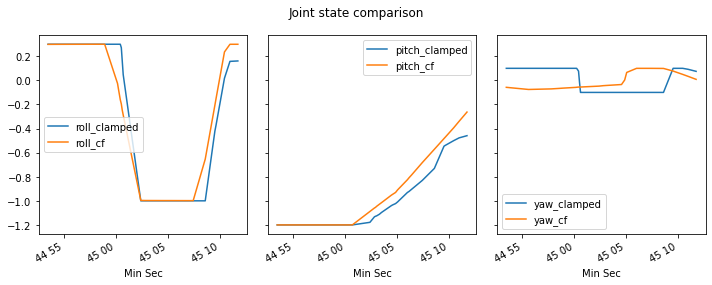

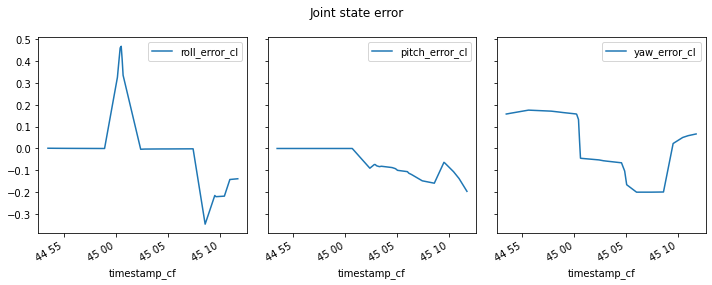

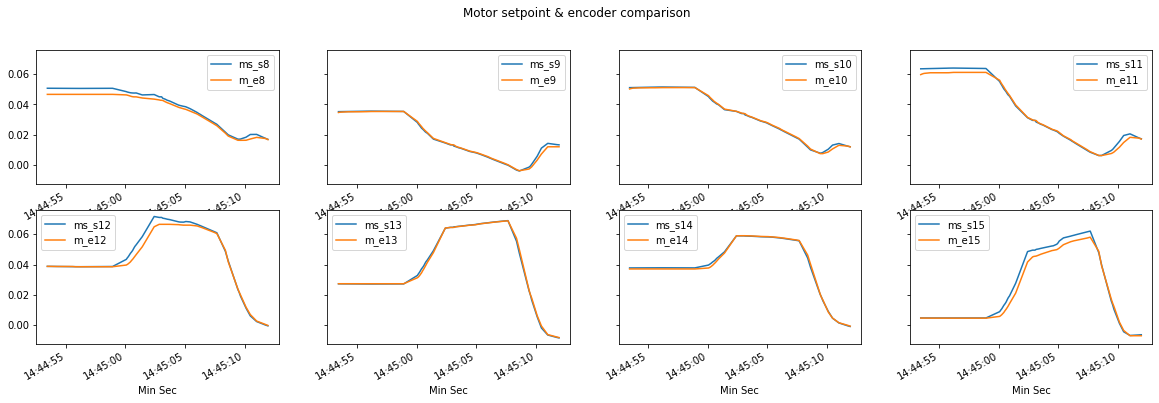

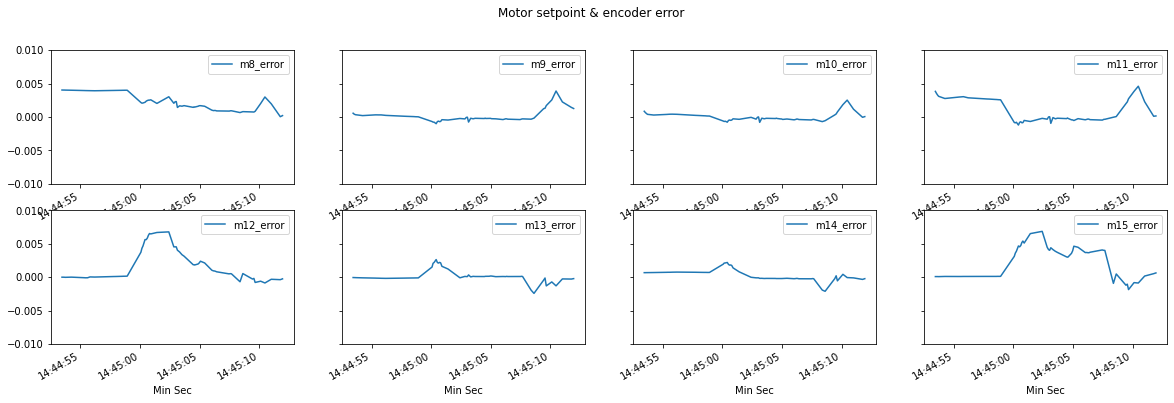

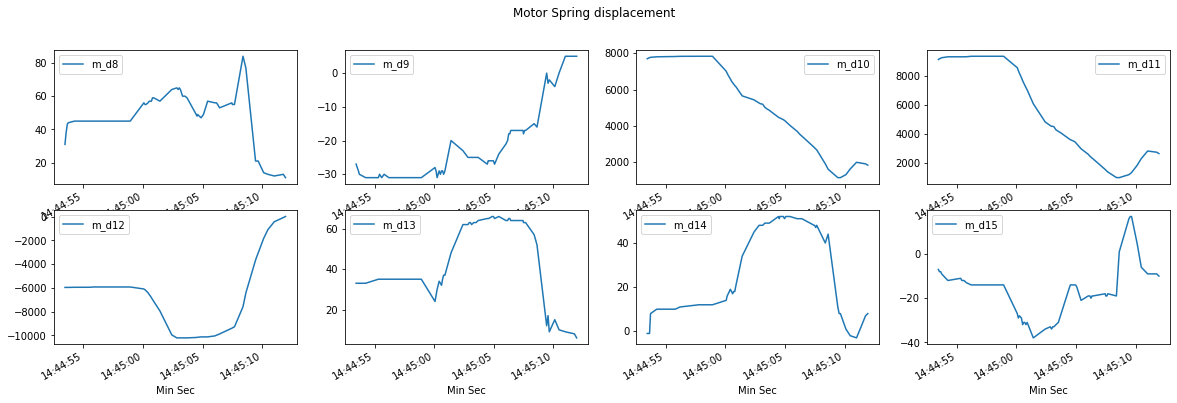

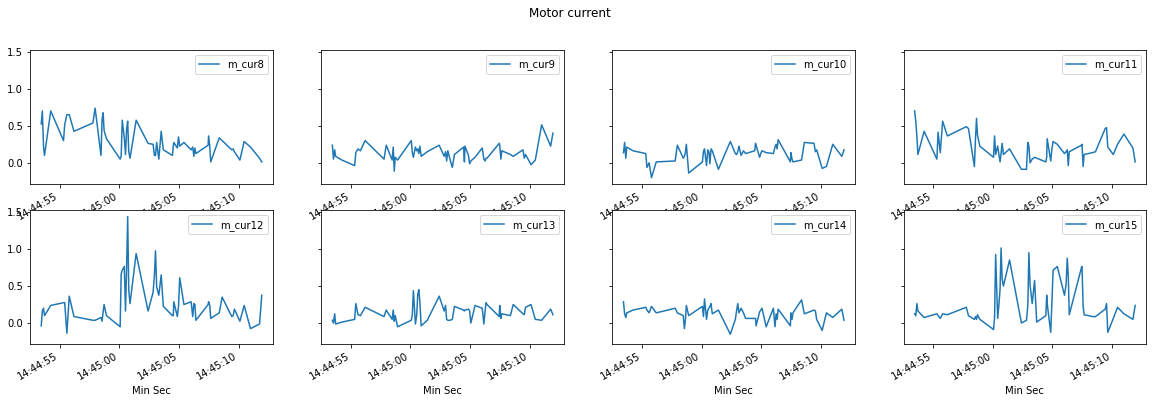

In [192]:
# plot detailed view of specified interval
int_11 , int12 = '14:44:53','14:45:12'
specific_interval = ds_cf_htc_merged.between_time(int_11 , int12) # set interval to your needs

#highest_error_intervals_roll: '14:44:40','14:44:50'


#plot comparison withOUT clamped values
"""fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

xfmt = md.DateFormatter('%M %S') # %f #  for millisenconds
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')       
plt.tight_layout()  # Optional ... often improves the layout """

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state comparison')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4),sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state error')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y='roll_error_cl', ax=ax1) # plot roll_error
specific_interval.plot(x='timestamp_cf', y='pitch_error_cl', ax=ax2) # plot pitch_error
specific_interval.plot(x='timestamp_cf', y='yaw_error_cl', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout

# plot right shoulder motor setpoint, encoder0 and current

specific_interval = ds_mostate.between_time(int_11 , int12)
#plot comparison

fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder comparison')
specific_interval.plot(x='timestamp_enc0', y=["ms_s8", "m_e8"], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s9", "m_e9"], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s10", "m_e10"], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s11", "m_e11"], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s12", "m_e12"], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s13", "m_e13"], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=["ms_s14", "m_e14"], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s15", "m_e15"], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 


#plot error
ylim_val = (-0.01,0.01)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder error')
specific_interval.plot(x='timestamp_enc0', y=['m8_error'], ax=ax8, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m9_error'], ax=ax9, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m10_error'], ax=ax10, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m11_error'], ax=ax11, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m12_error'], ax=ax12, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m13_error'], ax=ax13, ylim=ylim_val, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m14_error'], ax=ax14, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m15_error'], ax=ax15, ylim=ylim_val, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6))  # 1 row, 3 columns
fig.suptitle('Motor Spring displacement')
specific_interval.plot(x='timestamp_enc0', y=['m_d8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_d14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d15'], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

#plot current
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor current')
specific_interval.plot(x='timestamp_enc0', y=['m_cur8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_cur14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur15'], ax=ax15, xlabel = 'Min Sec') 


<AxesSubplot:xlabel='Min Sec'>

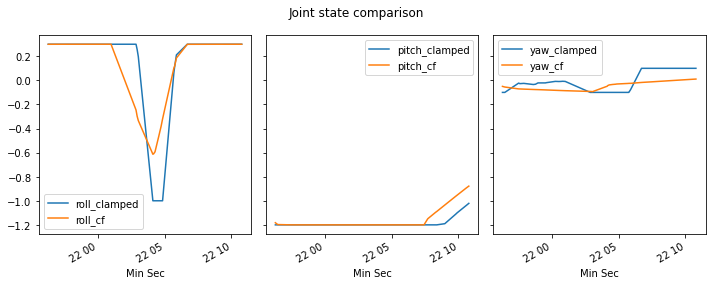

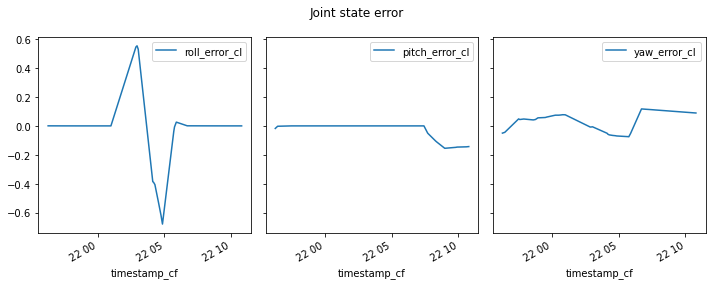

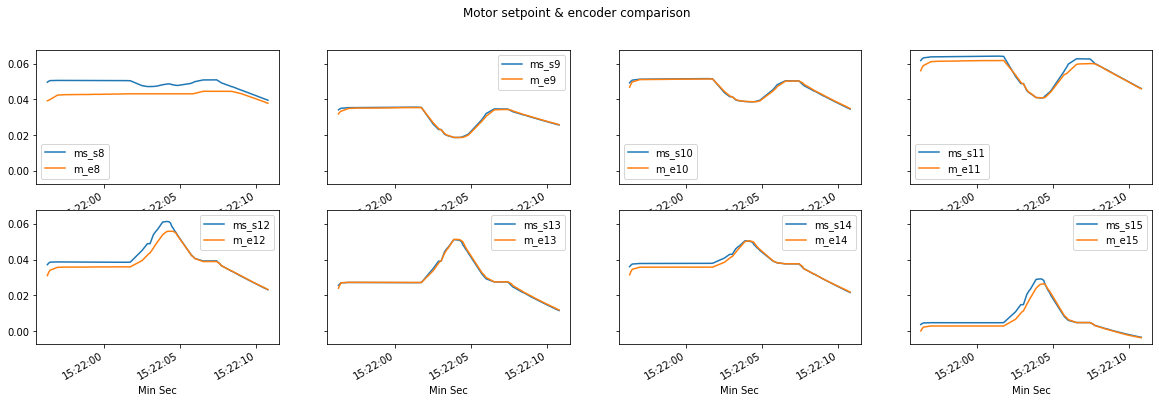

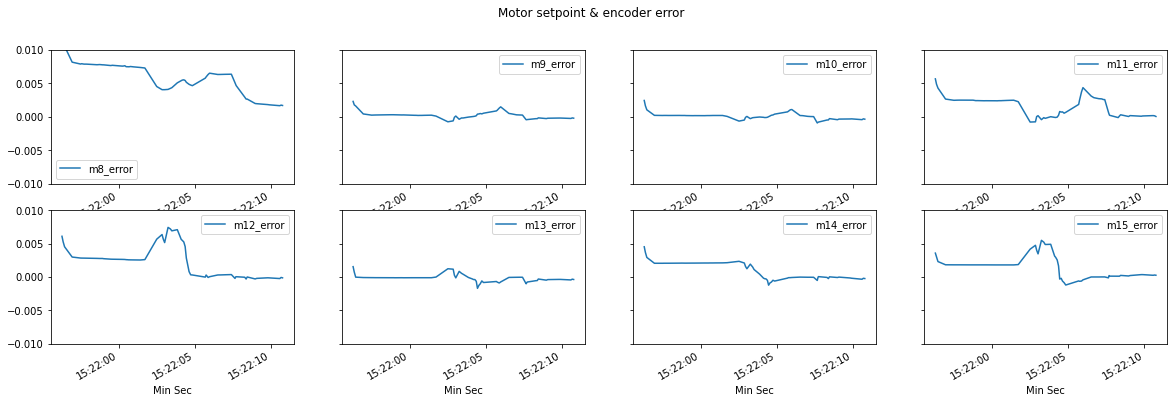

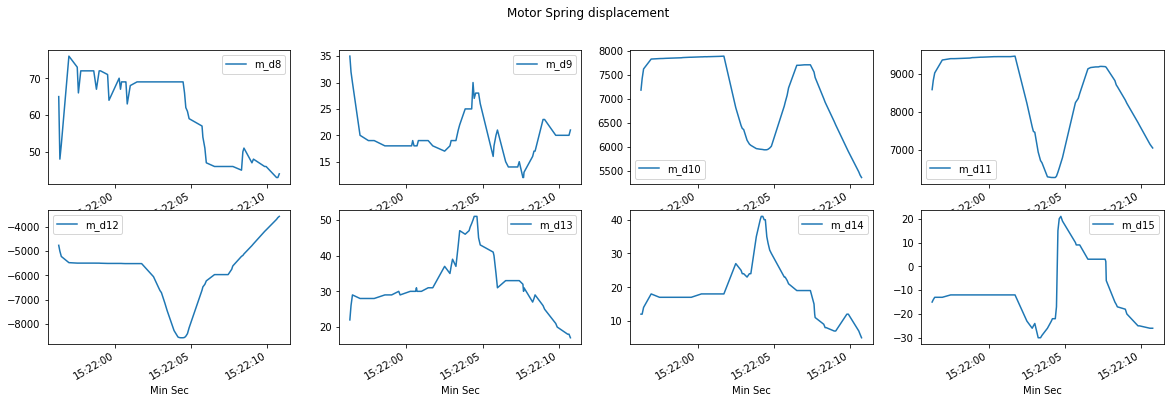

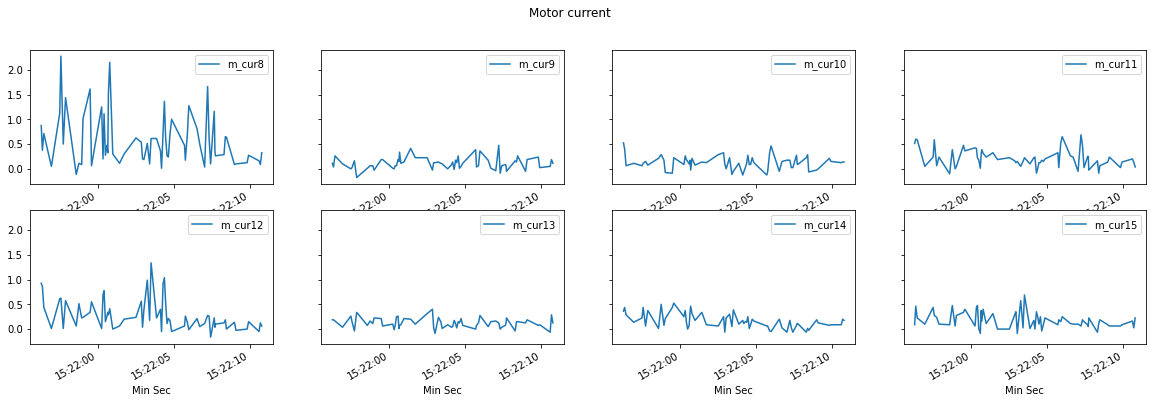

In [193]:
# plot detailed view of specified interval
int_11 , int12 = '15:21:56','15:22:11'
int_21 , int22 = '14:38:27','14:53:42'
specific_interval = ds_cf_htc_merged.between_time(int_11 , int12) # set interval to your needs

#highest_error_intervals_roll: '14:44:40','14:44:50'


#plot comparison withOUT clamped values
"""fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

xfmt = md.DateFormatter('%M %S') # %f #  for millisenconds
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')       
plt.tight_layout()  # Optional ... often improves the layout """

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state comparison')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4),sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state error')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y='roll_error_cl', ax=ax1) # plot roll_error
specific_interval.plot(x='timestamp_cf', y='pitch_error_cl', ax=ax2) # plot pitch_error
specific_interval.plot(x='timestamp_cf', y='yaw_error_cl', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout

# plot right shoulder motor setpoint, encoder0 and current

specific_interval = ds_mostate.between_time(int_11 , int12)
#plot comparison

fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder comparison')
specific_interval.plot(x='timestamp_enc0', y=["ms_s8", "m_e8"], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s9", "m_e9"], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s10", "m_e10"], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s11", "m_e11"], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s12", "m_e12"], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s13", "m_e13"], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=["ms_s14", "m_e14"], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s15", "m_e15"], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 


#plot error
ylim_val = (-0.01,0.01)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder error')
specific_interval.plot(x='timestamp_enc0', y=['m8_error'], ax=ax8, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m9_error'], ax=ax9, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m10_error'], ax=ax10, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m11_error'], ax=ax11, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m12_error'], ax=ax12, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m13_error'], ax=ax13, ylim=ylim_val, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m14_error'], ax=ax14, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m15_error'], ax=ax15, ylim=ylim_val, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6))  # 1 row, 3 columns
fig.suptitle('Motor Spring displacement')
specific_interval.plot(x='timestamp_enc0', y=['m_d8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_d14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d15'], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

#plot current
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor current')
specific_interval.plot(x='timestamp_enc0', y=['m_cur8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_cur14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur15'], ax=ax15, xlabel = 'Min Sec') 

<AxesSubplot:xlabel='Min Sec'>

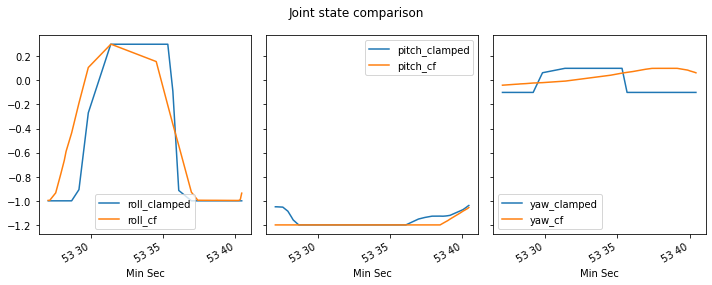

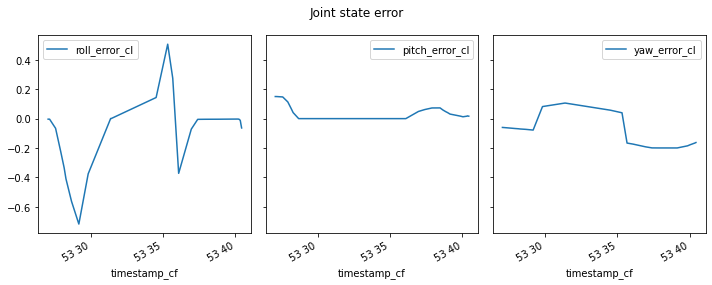

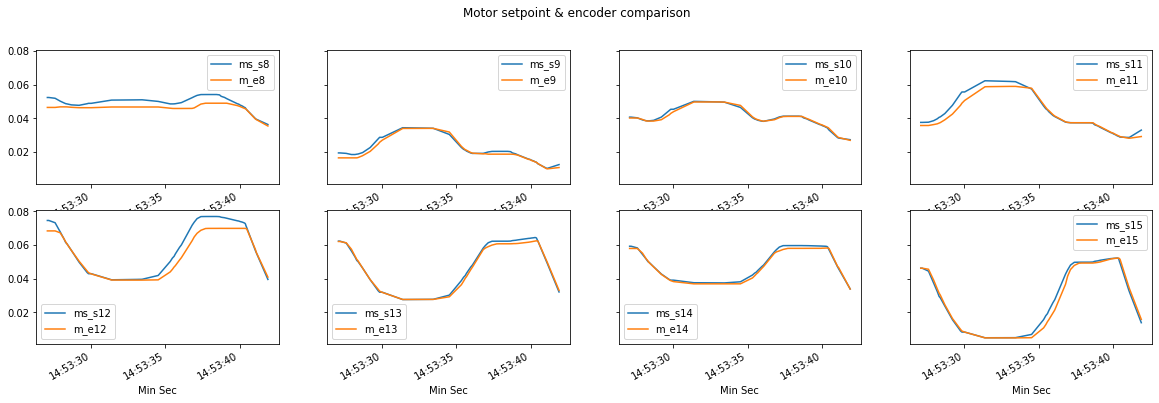

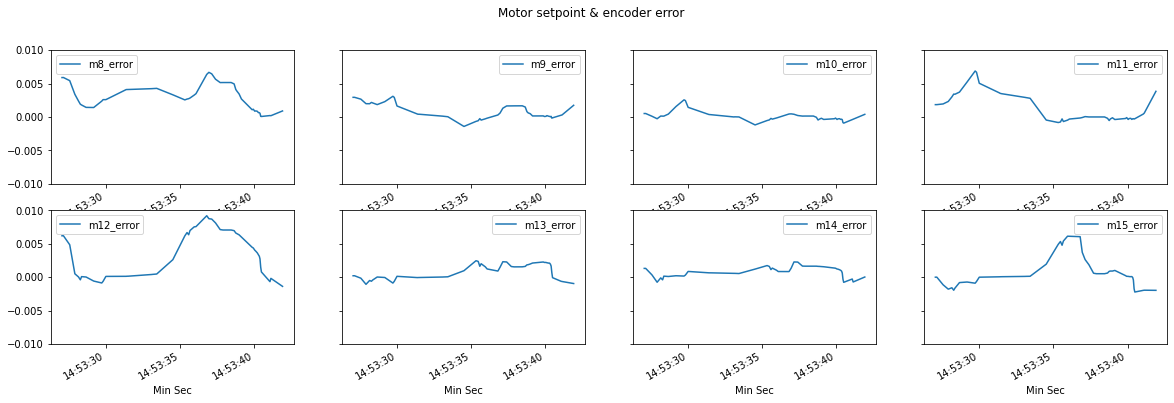

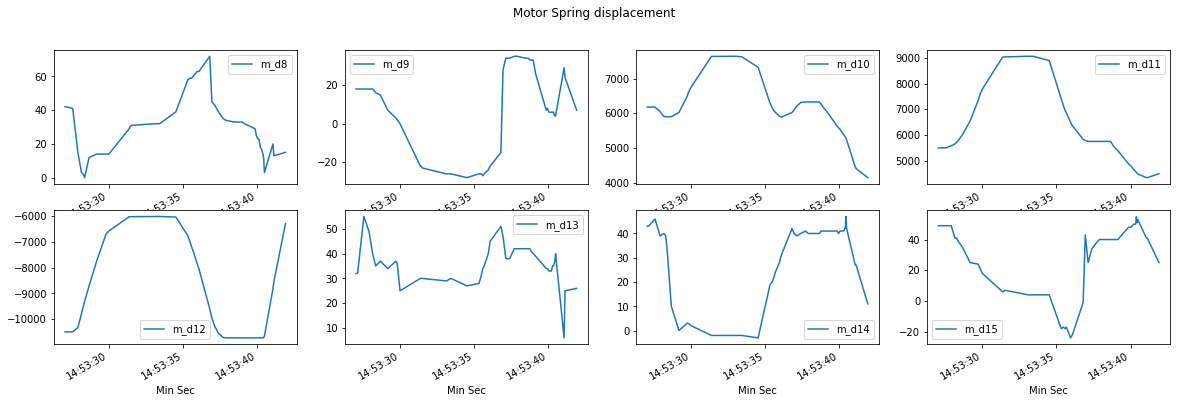

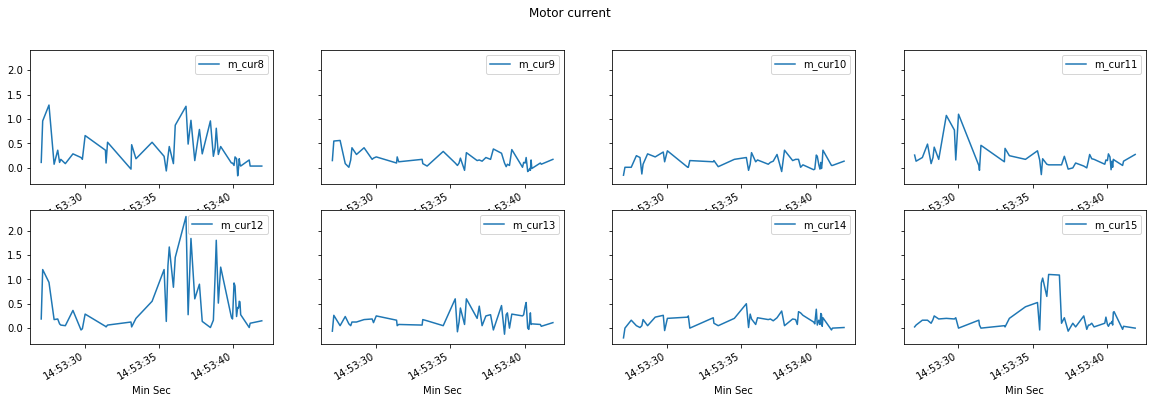

In [194]:
# plot detailed view of specified interval
int_11 , int12 = '14:53:27','14:53:42'
specific_interval = ds_cf_htc_merged.between_time(int_11 , int12) # set interval to your needs

#highest_error_intervals_roll: '14:44:40','14:44:50'


#plot comparison withOUT clamped values
"""fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

xfmt = md.DateFormatter('%M %S') # %f #  for millisenconds
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_htc", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_htc", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_htc", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')       
plt.tight_layout()  # Optional ... often improves the layout """

#plot comparison with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state comparison')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y=["roll_clamped", "roll_cf"], ax=ax1, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["pitch_clamped", "pitch_cf"], ax=ax2, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_cf', y=["yaw_clamped", "yaw_cf"],ax=ax3, xlabel = 'Min Sec')
plt.tight_layout()  # Optional ... often improves the layout 

# plot error with clamped values
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4),sharey=True)  # 1 row, 3 columns
fig.suptitle('Joint state error')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_formatter(xfmt)
specific_interval.plot(x='timestamp_cf', y='roll_error_cl', ax=ax1) # plot roll_error
specific_interval.plot(x='timestamp_cf', y='pitch_error_cl', ax=ax2) # plot pitch_error
specific_interval.plot(x='timestamp_cf', y='yaw_error_cl', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout

# plot right shoulder motor setpoint, encoder0 and current

specific_interval = ds_mostate.between_time(int_11 , int12)
#plot comparison

fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder comparison')
specific_interval.plot(x='timestamp_enc0', y=["ms_s8", "m_e8"], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s9", "m_e9"], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s10", "m_e10"], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s11", "m_e11"], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s12", "m_e12"], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s13", "m_e13"], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=["ms_s14", "m_e14"], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=["ms_s15", "m_e15"], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 


#plot error
ylim_val = (-0.01,0.01)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor setpoint & encoder error')
specific_interval.plot(x='timestamp_enc0', y=['m8_error'], ax=ax8, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m9_error'], ax=ax9, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m10_error'], ax=ax10, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m11_error'], ax=ax11, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m12_error'], ax=ax12, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m13_error'], ax=ax13, ylim=ylim_val, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m14_error'], ax=ax14, ylim=ylim_val, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m15_error'], ax=ax15, ylim=ylim_val, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

#plot displacement
ylim_val_d = (-200,200)
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6))  # 1 row, 3 columns
fig.suptitle('Motor Spring displacement')
specific_interval.plot(x='timestamp_enc0', y=['m_d8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_d14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_d15'], ax=ax15, xlabel = 'Min Sec') 
#plt.tight_layout()  # Optional ... often improves the layout 

## motor ids: left shoulder 0-7; right shoulder 8-15

#plot current
fig, ((ax8,ax9,ax10,ax11),(ax12,ax13,ax14,ax15)) = plt.subplots(2,4, figsize=(20,6),sharey=True)  # 1 row, 3 columns
fig.suptitle('Motor current')
specific_interval.plot(x='timestamp_enc0', y=['m_cur8'], ax=ax8, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur9'], ax=ax9, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur10'], ax=ax10, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur11'], ax=ax11, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur12'], ax=ax12, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur13'], ax=ax13, xlabel = 'Min Sec') 
specific_interval.plot(x='timestamp_enc0', y=['m_cur14'], ax=ax14, xlabel = 'Min Sec')
specific_interval.plot(x='timestamp_enc0', y=['m_cur15'], ax=ax15, xlabel = 'Min Sec') 